# Quantum Computing Fundamentals - Single & Multiple Qubit Quantum Gates

### Links to important documentation

Qiskit Tools - https://qiskit.org/documentation/apidoc/tools.html

Qiskit Quantum Information - https://qiskit.org/documentation/apidoc/quantum_info.html

Qiskit QASM - https://qiskit.org/documentation/apidoc/qasm.html

Qiskit Providers - https://qiskit.org/documentation/apidoc/providers.html

Qiskit Execute - https://qiskit.org/documentation/apidoc/execute.html

Qiskit Circuit - https://qiskit.org/documentation/apidoc/circuit.html

Qiskit Visualization - https://qiskit.org/documentation/apidoc/visualization.html

Transpilation - https://qiskit.org/documentation/apidoc/transpiler.html

IBMQ Backend - https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html

Working of Qiskit Backends - https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463

In [1]:
# Importing the necessary libraries
import qiskit
import numpy as np
from qiskit import Aer, QuantumCircuit, execute, IBMQ
from qiskit.providers.aer import AerSimulator # Aer Simulator
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error
import qiskit.tools.jupyter
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_state_city # 3D Histogram
from qiskit.visualization import plot_histogram # 2D Histogram
from qiskit.visualization import plot_state_qsphere # Used for Multi Qubit Visualization
from qiskit.visualization import array_to_latex # Displaying states in latex format
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_bloch_vector # Plot a sphere, axes, the Bloch vector, and its projections onto each axis.
from qiskit import ClassicalRegister, QuantumRegister # Quantum and Classical Registers
from qiskit import BasicAer # Python simulators on statevector, unitary and qasm_simulator
from qiskit.circuit import Gate # Creating a Unitary Gate
from qiskit.tools.visualization import circuit_drawer # Drawing circuits as a self contained function
from qiskit.extensions import RXGate, XGate, CXGate
from qiskit.compiler import transpile, assemble
from qiskit.extensions import Initialize # Initialization of quantum custom states
from qiskit.tools.monitor import job_monitor # Monitors job status
from qiskit.quantum_info import Statevector # Intializes the Statevector
from qiskit.quantum_info import random_statevector # Generates random quantum states
from qiskit.quantum_info import Operator, Pauli # Can be used to define custom operators 
from qiskit.quantum_info import state_fidelity, average_gate_fidelity, process_fidelity # Calculates state fidelities and operator fidelity
from math import pi, sqrt # pi = 3.14 and square root operation

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [64]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

OpenQASM Article - https://medium.com/qiskit/a-new-openqasm-for-a-new-era-of-dynamic-circuits-87f031cac49 and https://github.com/Qiskit/openqasm

Classical Computation on a Quantum Computer - https://qiskit.org/textbook/ch-gates/oracles.html

## Single Qubit Quantum Logic Gates

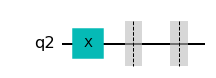

In [4]:
# Let's do an X-gate on a |0> qubit
q = QuantumRegister(1) #Quantum Register with a single qubit
qc = QuantumCircuit(q) #Quantum Circuit
qc.x(q[0]) # X Gate
qc.save_statevector()
qc.save_unitary()
qc.draw('mpl')

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


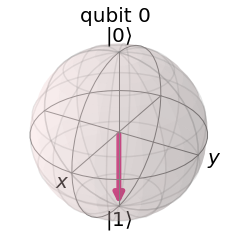

In [66]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

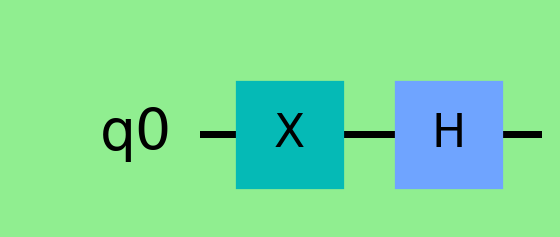

In [2]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.h(q[0])

style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style=style, scale=3.5, plot_barriers=False, reverse_bits=False)

### Reading and Writing QASM Files

In [105]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q256[1];
x q256[0];
h q256[0];



In [106]:
qc.qasm(formatted=True, filename='my_circuit.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q256[1];
x q256[0];
h q256[0];



In [107]:
new_qc = QuantumCircuit.from_qasm_file('my_circuit.qasm')

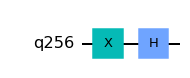

In [109]:
new_qc.draw('mpl')

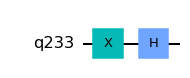

In [98]:
circuit_drawer(qc, output='mpl', plot_barriers=True)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


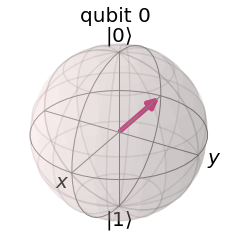

In [30]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

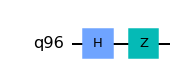

In [32]:
# Let's do an Z-gate on |+>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0]) # Hadamard
qc.z(q[0]) # Z Gate
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


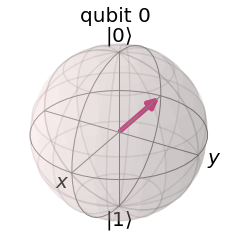

In [33]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

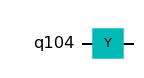

In [34]:
# Let's do an Y-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
#qc.x(q[0])
qc.y(q[0])
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


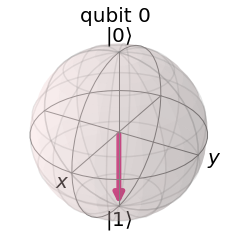

In [35]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

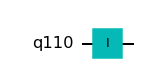

In [36]:
# Let's do an I-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
#qc.x(q[0])
qc.i(q[0])
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


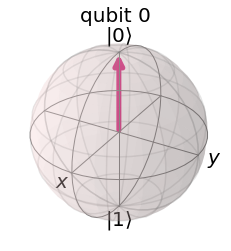

In [37]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

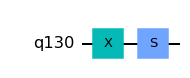

In [42]:
# Let's do an S-gate on a |1> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.s(q[0])
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


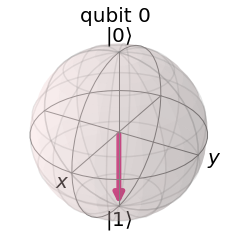

In [43]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

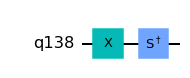

In [44]:
# Let's do an S Dagger-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.sdg(q[0])
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


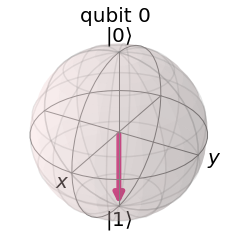

In [45]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

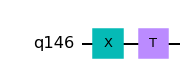

In [46]:
# Let's do an T-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.t(q[0])
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


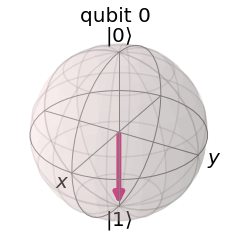

In [47]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

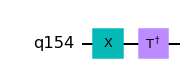

In [48]:
# Let's do an T Dagger-gate on a |0> qubit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.tdg(q[0])
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


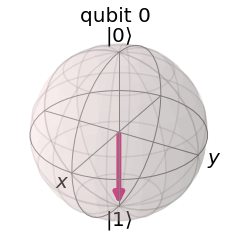

In [49]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

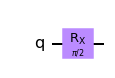

In [50]:
# RX Gate
qc = QuantumCircuit(1)
qc.rx(pi/2,0)
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


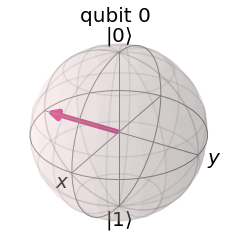

In [51]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

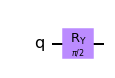

In [52]:
qc = QuantumCircuit(1)
qc.ry(pi/2,0)
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


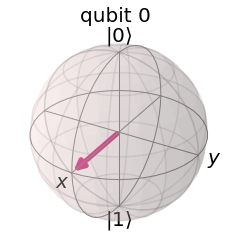

In [53]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

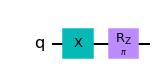

In [54]:
qc = QuantumCircuit(1)
qc.x(0)
qc.rz(pi,0)
qc.draw(output='mpl')

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


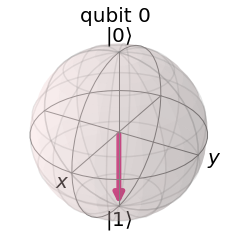

In [55]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

## Multiple Qubit Quantum Logic Gates

### Controlled NOT Gate (CX)

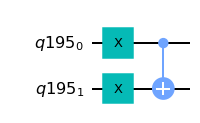

In [61]:
# Let's do an CX-gate on |10>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[1])
qc.cx(q[0],q[1])
qc.draw(output='mpl')


Quantum state is: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


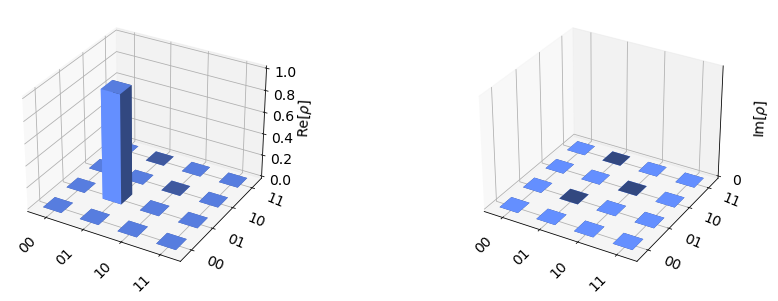

In [62]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a 3 D histogram
plot_state_city(psi)

Ordering of qubits in Qiskit is reversed and that is why the state obtained above is NOT 01 but it is 10

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


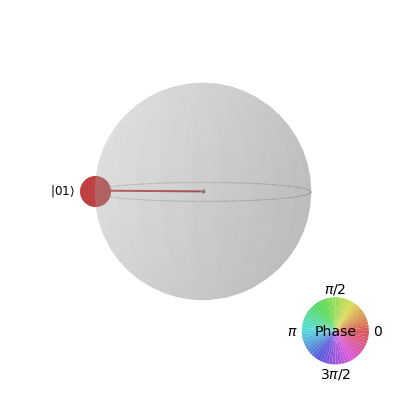

In [63]:
psi  = result_state.get_statevector(qc)
plot_state_qsphere(psi)

### Controlled Hadamard Gate (CH)

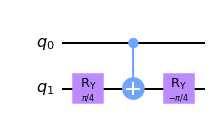

In [64]:
qc = QuantumCircuit(2)
# Controlled-H Gate
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.draw(output='mpl')


Quantum state is: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


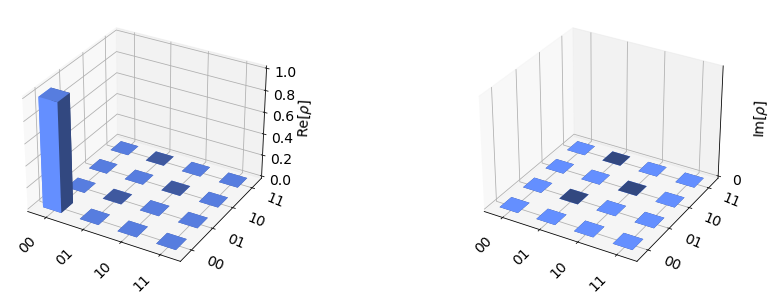

In [65]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


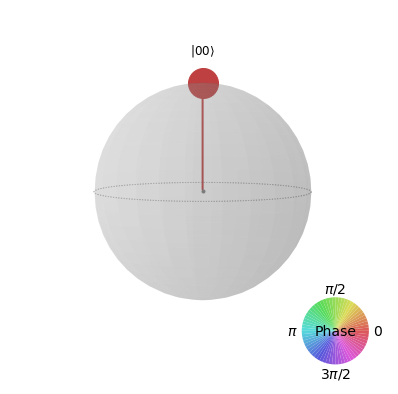

In [66]:
plot_state_qsphere(psi)

### Controlled Z Gate

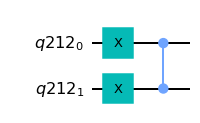

In [67]:
# Let's do an CZ-gate on |11>
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.x(q[1])
qc.cz(q[0],q[1])
qc.draw(output='mpl')


Quantum state is: [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]


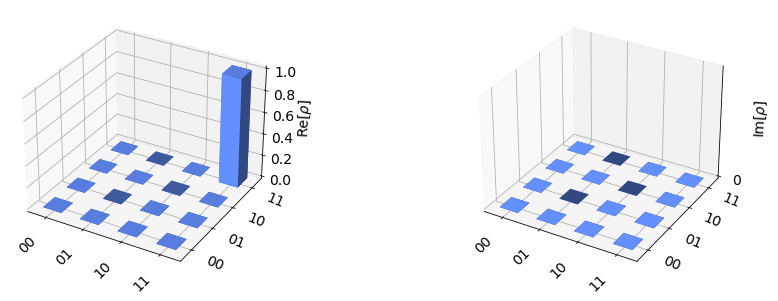

In [68]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


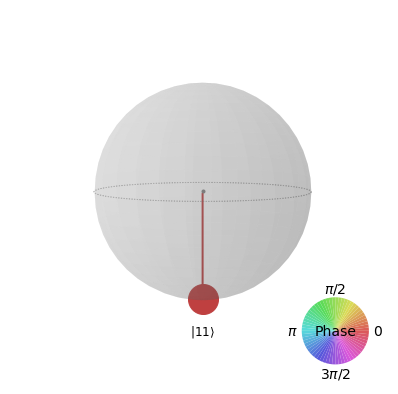

In [69]:
plot_state_qsphere(psi)

### Controlled Z Gate from CX and H Gates

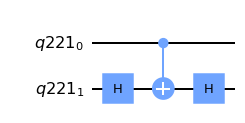

In [70]:
# Let's make CZ-gate with CX-gate and H-gate
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

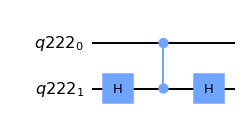

In [71]:
# Let's make CX-gate with CZ-gate and H-gate
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cz(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

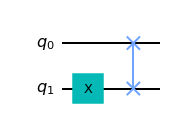

In [73]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.x(1)
qc.swap(0,1)
qc.draw(output='mpl')


Quantum state is: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


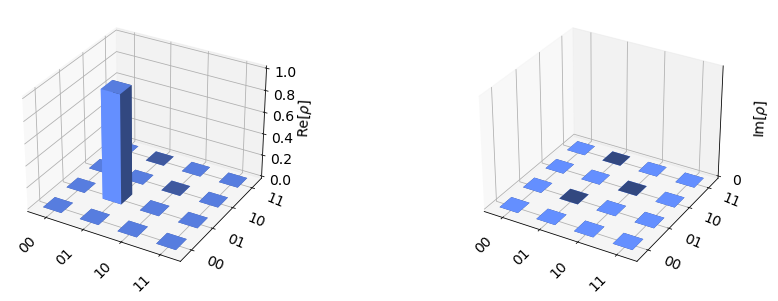

In [74]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


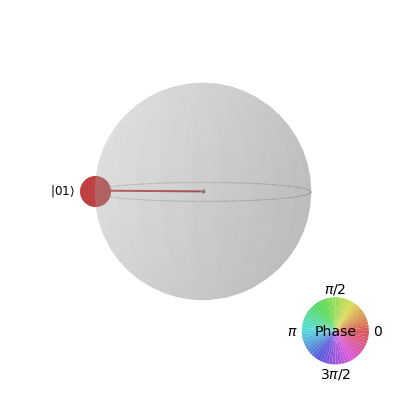

In [75]:
plot_state_qsphere(psi)

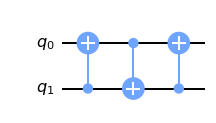

In [76]:
# SWAP Gate using CNOT
qc = QuantumCircuit(2)
qc.cx(1,0) 
qc.cx(0,1) 
qc.cx(1,0)
qc.draw(output='mpl')

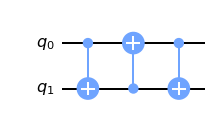

In [77]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw(output='mpl')


Quantum state is: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


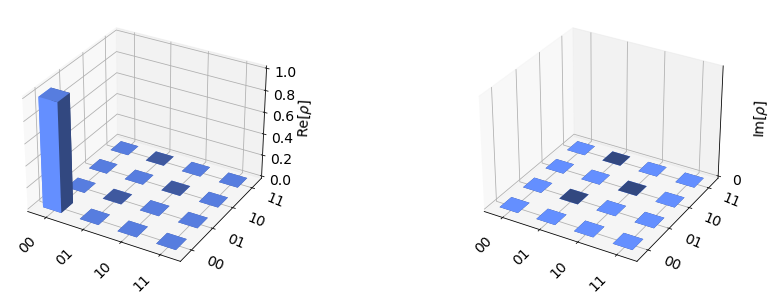

In [78]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


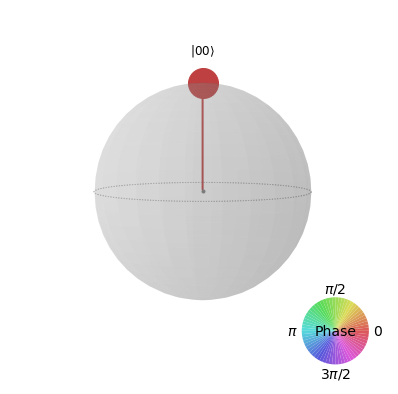

In [79]:
plot_state_qsphere(psi)

## Creating and Visualizing Bell States

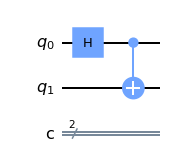

In [22]:
# Let's make a Bell State! 
#q = QuantumRegister(2,2)
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#qc.measure(0,0)
#qc.measure(1,1)
qc.draw(output='mpl')


Quantum state is: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


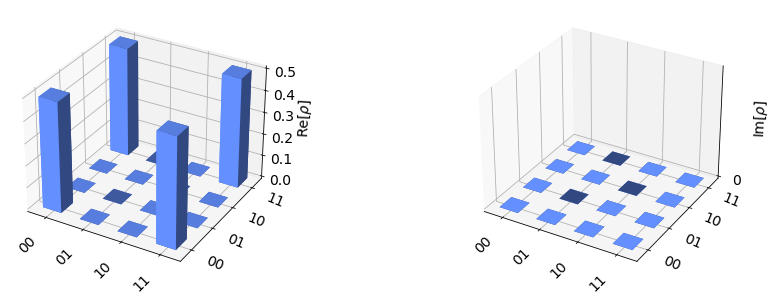

In [23]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

In [68]:
# quantum circuit to make a Bell state 
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 512, '00': 488}


In [69]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(circ, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circ)
print("\nTotal counts are:",counts)


Total counts are: {'11': 511, '00': 489}


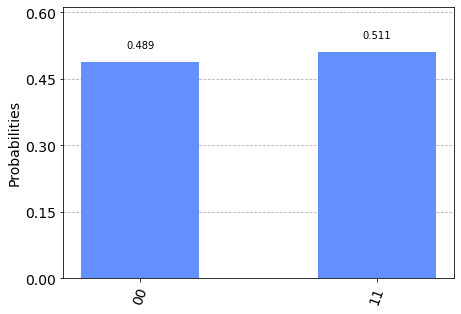

In [70]:
# Plot a histogram
plot_histogram(counts)

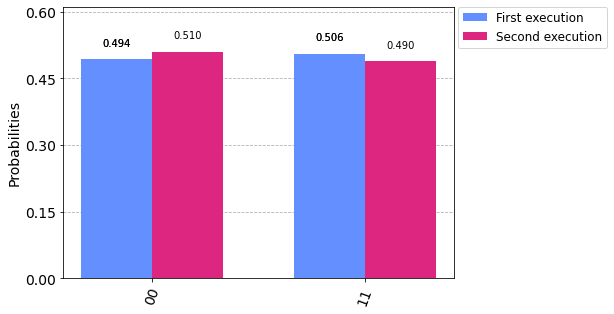

In [29]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

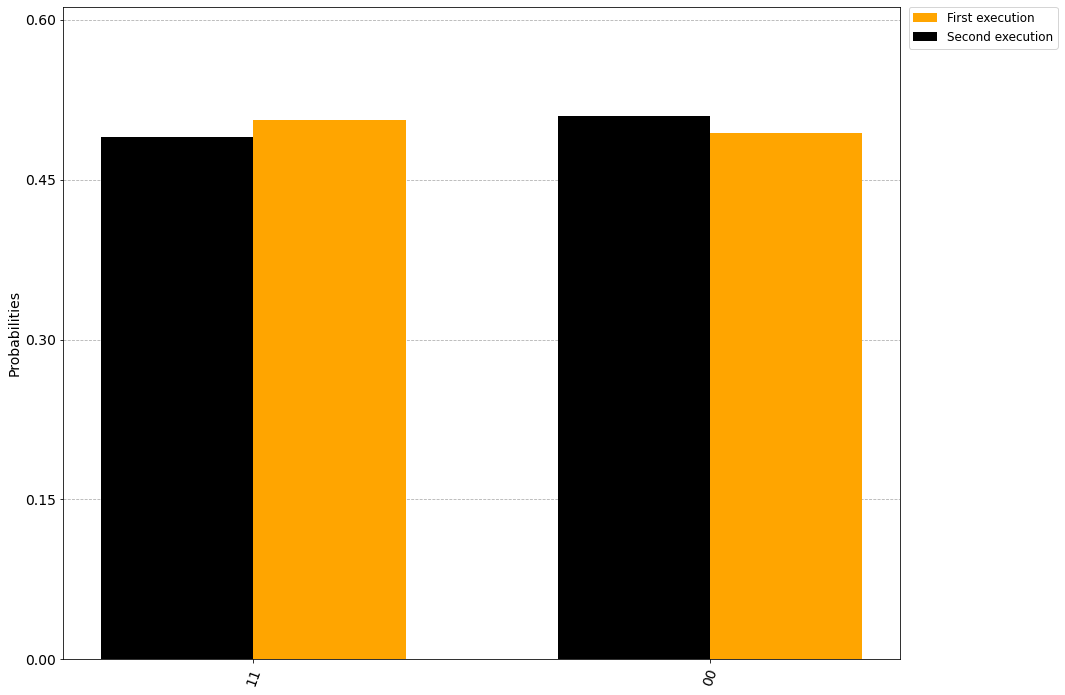

In [30]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12), 
               color=['orange', 'black'], bar_labels=False)

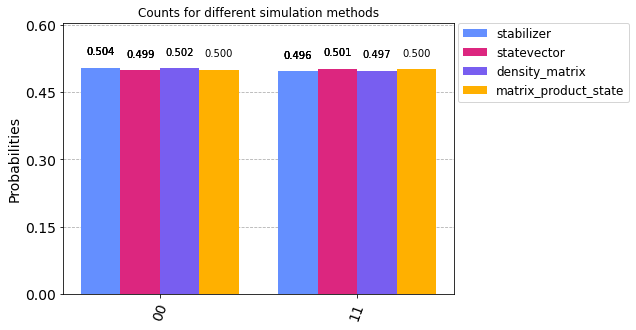

In [71]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

In [45]:
# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

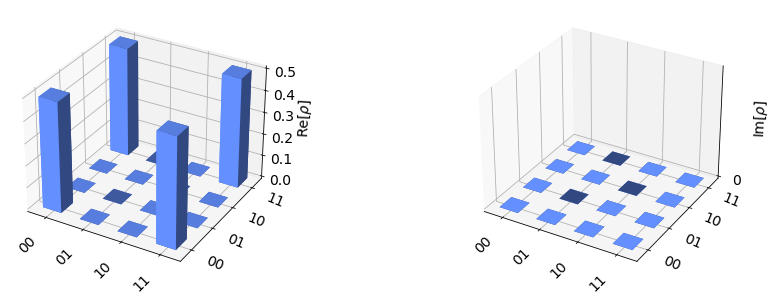

In [46]:
plot_state_city(psi)

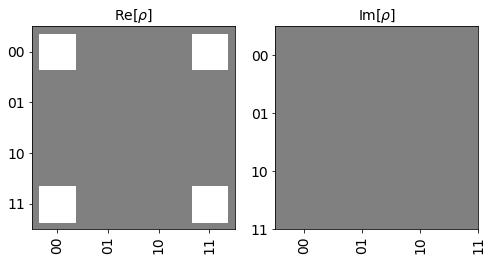

In [47]:
plot_state_hinton(psi)

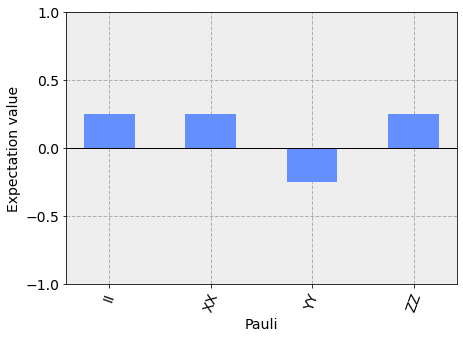

In [48]:
plot_state_paulivec(psi)

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


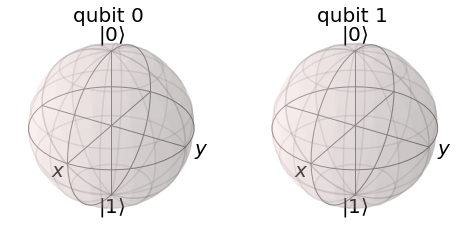

In [49]:
plot_bloch_multivector(psi)

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


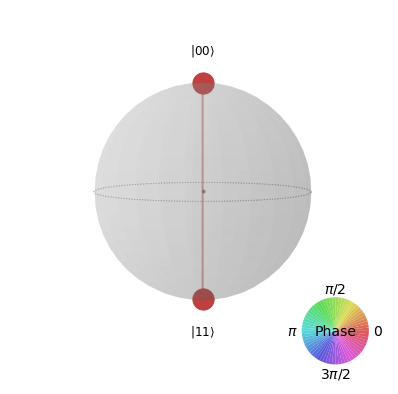

In [50]:
plot_state_qsphere(psi)

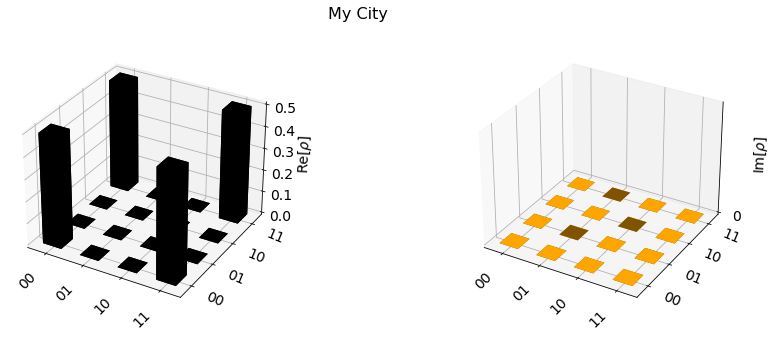

In [51]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

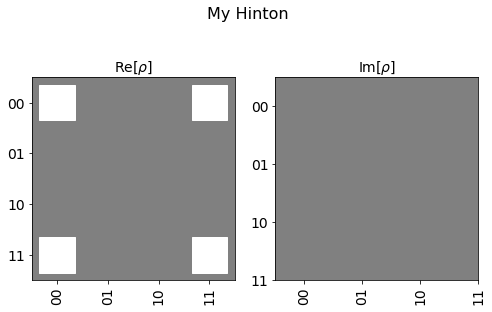

In [52]:
plot_state_hinton(psi, title="My Hinton")

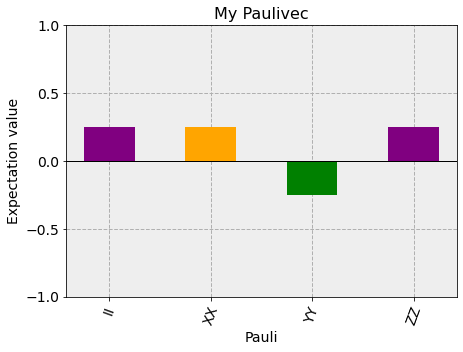

In [53]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:402: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


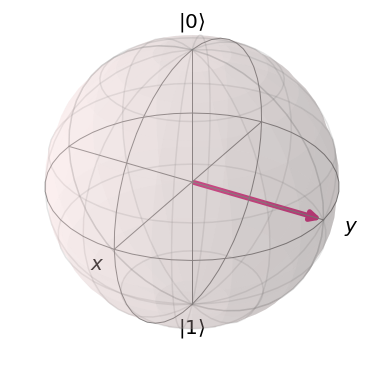

In [43]:
plot_bloch_vector([0,1,0])

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:402: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


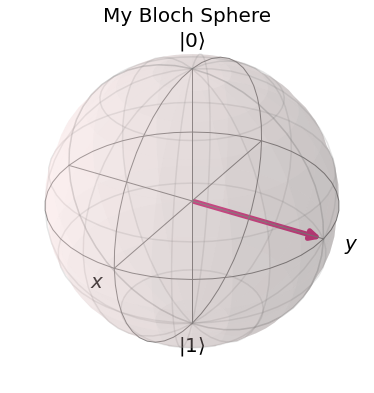

In [44]:
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

### Toffoli Gate - CCX Quantum Gate

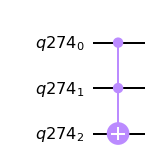

In [89]:
# Let's do an CCX-gate (Toffoli) on |000>
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')


Quantum state is: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


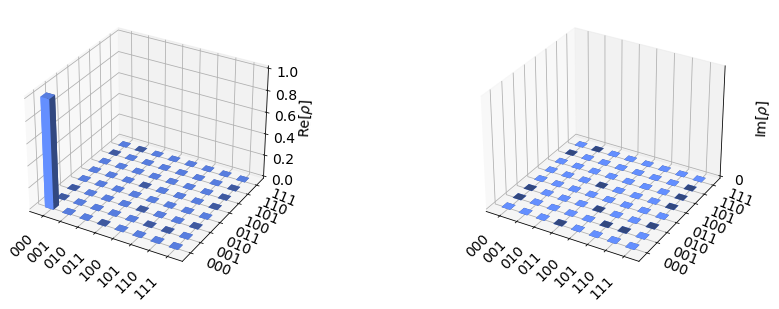

In [90]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


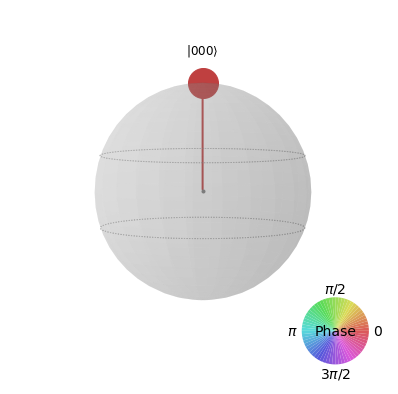

In [91]:
plot_state_qsphere(psi)

### Decomposed Toffoli

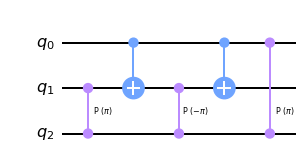

In [92]:
theta = pi
qc = QuantumCircuit(3)
qc.cp(theta,1,2)
qc.cx(0,1)
qc.cp(-theta,1,2)
qc.cx(0,1)
qc.cp(theta,0,2)
qc.draw('mpl')


Quantum state is: [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-0.j]


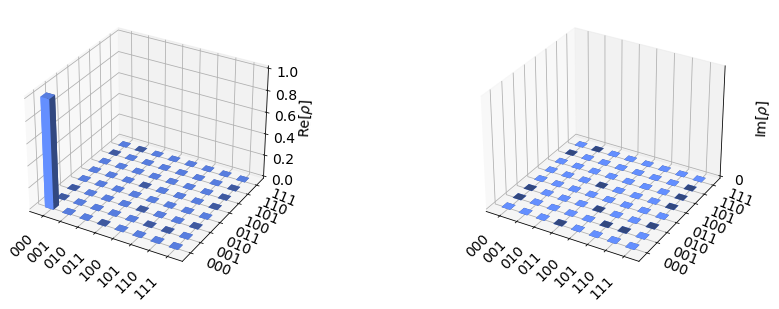

In [93]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

C:\Users\srinj\Anaconda3\envs\ZX_QNLP\lib\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


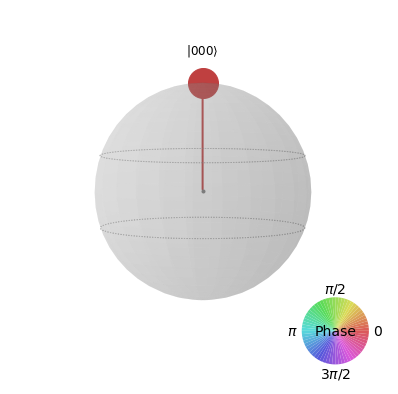

In [94]:
plot_state_qsphere(psi)

### Fredkin Gate - CSWAP Quantum Gate

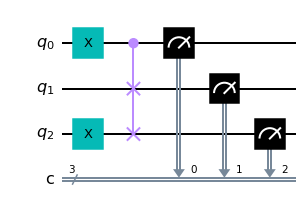

In [31]:
# Let's do an CSWAP-gate - Fredkin
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(2)
qc.cswap(0,1,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw(output='mpl')


Quantum state is: [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


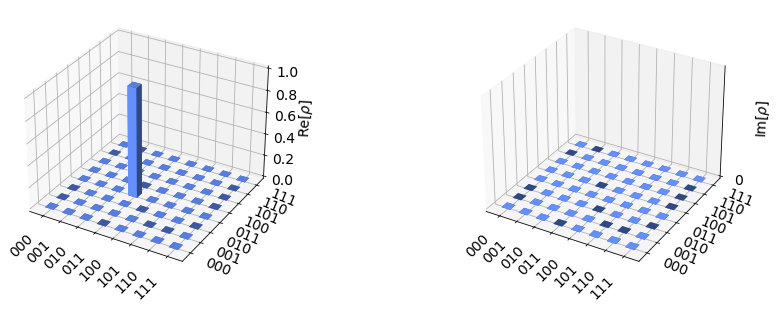

In [32]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(qc, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(qc)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

In [33]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal counts are:",counts)


Total counts are: {'011': 1000}


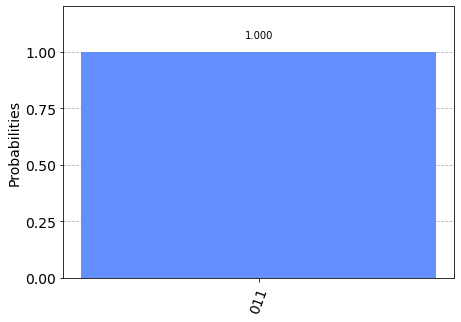

In [34]:
# Plot a histogram
plot_histogram(counts)

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


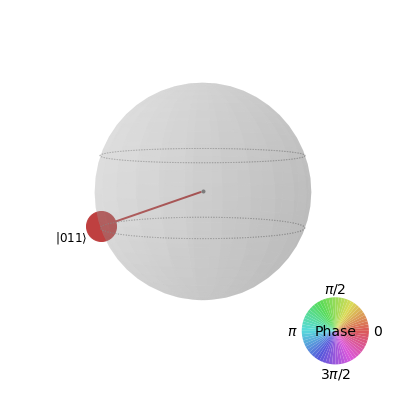

In [35]:
plot_state_qsphere(psi)

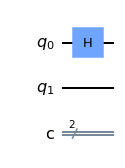

In [34]:
# Quantum transformations (Core of the quantum circuit)
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.draw('mpl')

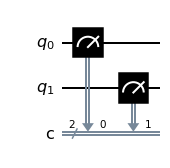

In [35]:
# Measurement section
meas = QuantumCircuit(2, 2)
meas.measure(0,0)
meas.measure(1,1)
# meas.measure([0, 1],[0, 1])
meas.draw('mpl')

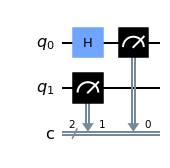

In [36]:
# The full circuit is the core + the measurements
qc = circ + meas
qc.draw('mpl')


Quantum state is: [0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


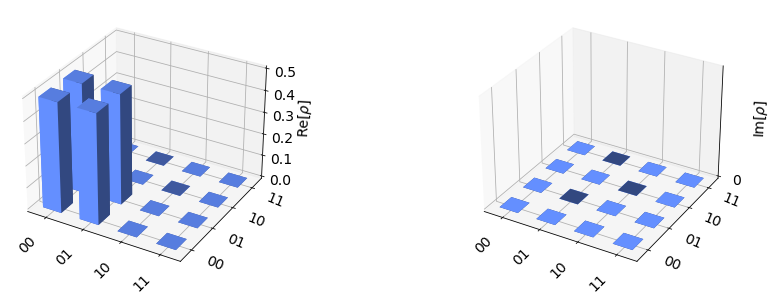

In [37]:
# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
simulator_state = Aer.get_backend('statevector_simulator') 

# Execute the circuit on the qasm simulator
job_state = execute(circ, simulator_state, shots=1000)

# Grab results from the job
result_state = job_state.result()

# Returns counts
psi  = result_state.get_statevector(circ)
print("\nQuantum state is:",psi)

# Plot a histogram
plot_state_city(psi)

In [38]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal counts are:",counts)


Total counts are: {'00': 502, '01': 498}


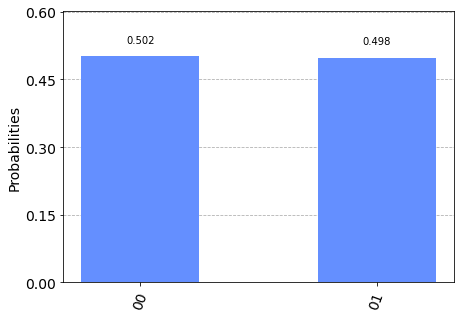

In [39]:
# Plot a histogram
plot_histogram(counts)

C:\Users\srinj\Anaconda3\envs\QML\lib\site-packages\qiskit\visualization\state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


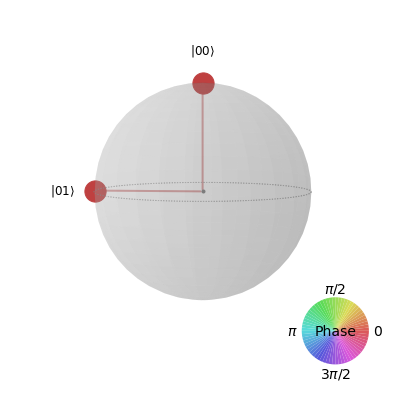

In [40]:
plot_state_qsphere(psi)

## The Bell States Circuit

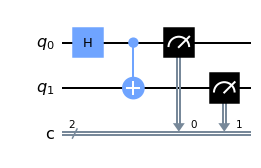

In [17]:
# Build the circuit to get the Bell state

# Quantum transformations (Core of the quantum circuit)
circ_bell = QuantumCircuit(2, 2)
circ_bell.h(0)
circ_bell.cx(0,1)
circ_bell.draw('mpl')

meas_bell = QuantumCircuit(2, 2)
meas_bell.measure([0,1],[0,1])

qc_bell = circ_bell + meas_bell
qc_bell.draw('mpl')

In [18]:
print("Circuit depth: ", qc_bell.depth())

Circuit depth:  3



Total count for 00 and 11 are: {'11': 497, '00': 503}


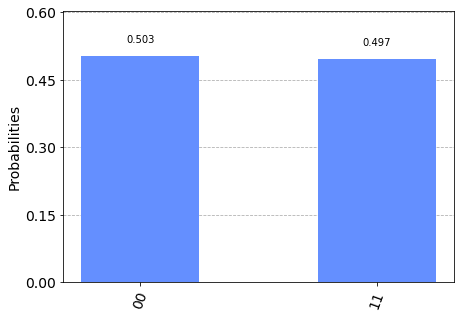

In [19]:
# Execute the circuit on the qasm simulator
job_bell = execute(qc_bell, simulator, shots=1000)

# Grab results from the job
result_bell = job_bell.result()

# Returns counts
counts_bell = result_bell.get_counts(qc_bell)
print("\nTotal count for 00 and 11 are:",counts_bell)

# Plot a histogram
plot_histogram(counts_bell)

## The GHZ State Circuit

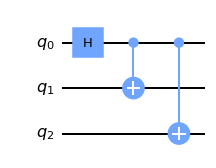

In [100]:
# Create a Quantum Circuit acting on a quantum register of three qubits
ghz_st = QuantumCircuit(3)

# Add a H gate on qubit 0, putting this qubit in superposition.
ghz_st.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
ghz_st.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
ghz_st.cx(0, 2)

ghz_st.draw('mpl')

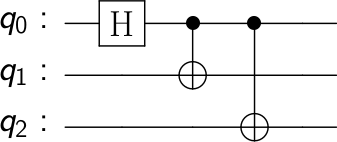

In [9]:
# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(ghz_st)

#draw using latex
ghz_st.draw('latex')

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


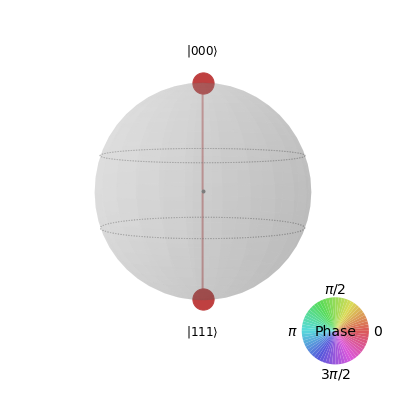

In [10]:
state.draw('qsphere')

In [11]:
U = Operator(ghz_st)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

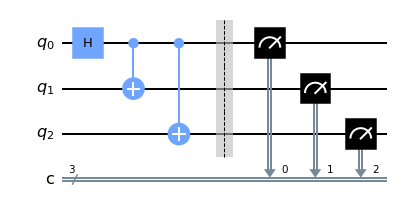

In [101]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(ghz_st, range(3), front=True)

#drawing the circuit
qc.draw('mpl')


The Histogram Plot is provided {'111': 522, '000': 478}


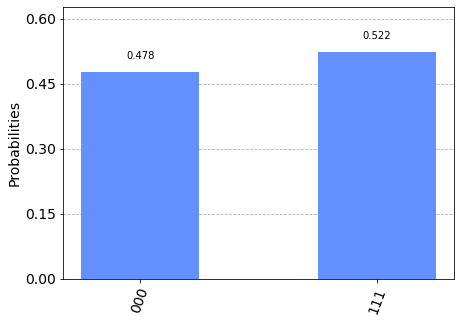

In [58]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job_ghz = execute(qc, simulator, shots=1000)

# Grab results from the job
result_ghz = job_ghz.result()

# Returns counts
counts_ghz = result_ghz.get_counts(qc)
print("\nThe Histogram Plot is provided",counts_ghz)

# Plot a histogram
plot_histogram(counts_ghz)

In [17]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = execute(ghz_st, backend)

result = job.result()

outputstate = result.get_statevector(ghz_st, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


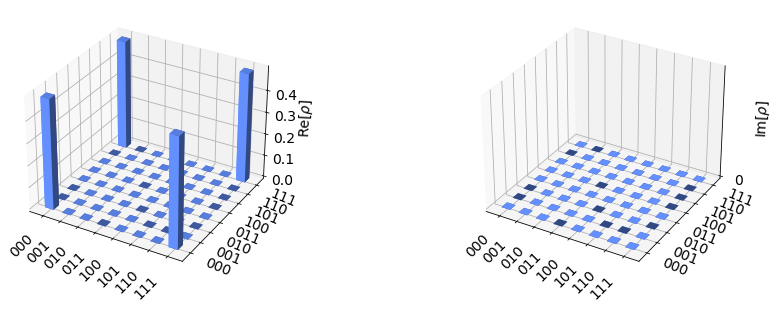

In [18]:
plot_state_city(outputstate)

In [20]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(ghz_st, backend)
result = job.result()

# Show the results
print(result.get_unitary(ghz_st, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [102]:
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)

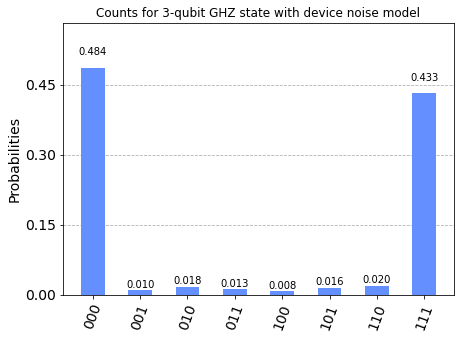

In [103]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(qc, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

## IBMQ Backend

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('e647d11cb21e1afa62cd295c1bef096c5cb9b8d57b208b117b05d799dd7534a1bcd0dfc65882935585cf3310af41cf2c7e681267976662f1507ec58a44ac26cb', overwrite=True)

In [ ]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(group='open')
device = provider.get_backend('ibmq_athens')

========================================================================================================================

## Initializing custom user defined quantum states 

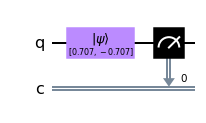

In [43]:
initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
arb_st = QuantumCircuit(1,1)
arb_st.initialize(initial_state, 0)
arb_st.measure(0,0)
arb_st.draw('mpl')

In [42]:
# Unitary Matrix of the Quantum Circuit
backend = BasicAer.get_backend('unitary_simulator')
job_ops = execute(arb_st, backend)
job_ops.result().get_unitary(arb_st, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [-0.707+0.j, -0.707+0.j]])


The Histogram Plot is provided {'1': 512, '0': 488}


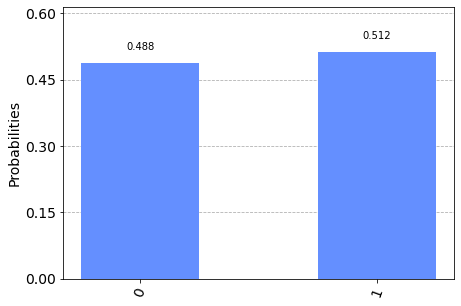

In [44]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job_arb = execute(arb_st, simulator, shots=1000)

# Grab results from the job
result_arb = job_arb.result()

# Returns counts
counts_arb = result_arb.get_counts(arb_st)
print("\nThe Histogram Plot is provided",counts_arb)

# Plot a histogram
plot_histogram(counts_arb)

## Initializing random statevector quantum states

In [11]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it in LaTeX
print('before circuit: {}'.format(psi))
array_to_latex(psi)

before circuit: Statevector([-0.68020529+0.64023228j,  0.29425055+0.20208911j],
            dims=(2,))


<IPython.core.display.Latex object>

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


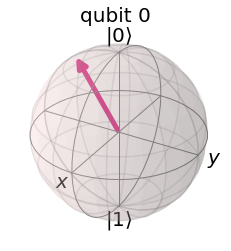

In [12]:
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [13]:
init_gate = Initialize(psi)
init_gate.label = "init"

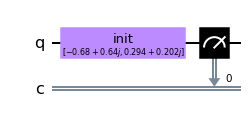

In [14]:
rnd_st = QuantumCircuit(1, 1)
rnd_st.append(init_gate, [0])
rnd_st.measure(0,0)
rnd_st.draw('mpl')


The Histogram Plot is provided {'0': 862, '1': 138}


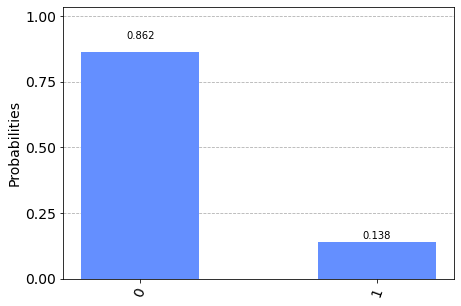

In [15]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job_rnd = execute(rnd_st, simulator, shots=1000)

# Grab results from the job
result_rnd = job_rnd.result()

# Returns counts
counts_rnd = result_rnd.get_counts(rnd_st)
print("\nThe Histogram Plot is provided",counts_rnd)

# Plot a histogram
plot_histogram(counts_rnd)

======================================================================================================================

## Calculating State Fidelity

In [23]:
alpha = random_statevector(2)
state1 = initial_state
state2 = initial_state
state_fidelity(state1, state2)

0.9999999999999996

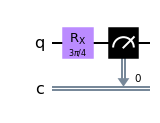

In [49]:
rx_gt = QuantumCircuit(1, 1)
rx_gt.rx(3*pi/4, 0)
rx_gt.measure(0,0)
rx_gt.draw('mpl')


The Histogram Plot is provided {'1': 858, '0': 142}


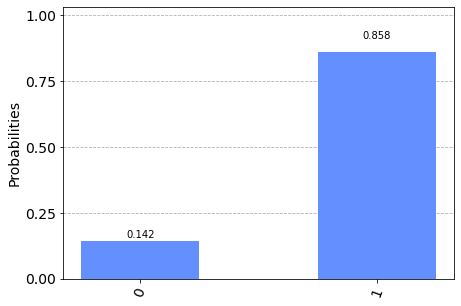

In [50]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job_rnd = execute(rx_gt, simulator, shots=1000)

# Grab results from the job
result_rnd = job_rnd.result()

# Returns counts
counts_rnd = result_rnd.get_counts(rx_gt)
print("\nThe Histogram Plot is provided",counts_rnd)

# Plot a histogram
plot_histogram(counts_rnd)

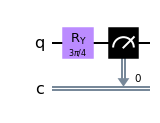

In [46]:
ry_gt = QuantumCircuit(1, 1)
ry_gt.ry(3*pi/4, 0)
ry_gt.measure(0,0)
ry_gt.draw('mpl')


The Histogram Plot is provided {'1': 830, '0': 170}


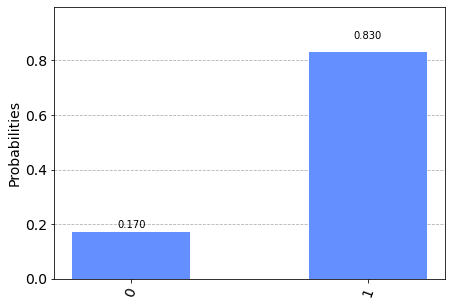

In [48]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job_rnd = execute(ry_gt, simulator, shots=1000)

# Grab results from the job
result_rnd = job_rnd.result()

# Returns counts
counts_rnd = result_rnd.get_counts(ry_gt)
print("\nThe Histogram Plot is provided",counts_rnd)

# Plot a histogram
plot_histogram(counts_rnd)

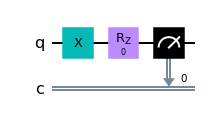

In [66]:
rz_gt = QuantumCircuit(1, 1)
rz_gt.x(0)
rz_gt.rz(0, 0)
rz_gt.measure(0,0)
rz_gt.draw('mpl')


The Histogram Plot is provided {'1': 1000}


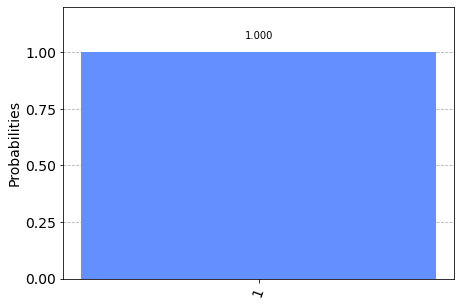

In [67]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job_rnd = execute(rz_gt, simulator, shots=1000)

# Grab results from the job
result_rnd = job_rnd.result()

# Returns counts
counts_rnd = result_rnd.get_counts(rz_gt)
print("\nThe Histogram Plot is provided",counts_rnd)

# Plot a histogram
plot_histogram(counts_rnd)

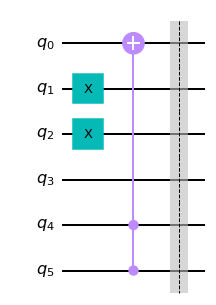

In [68]:
# Create the quantum circuit
qc = QuantumCircuit(6)
qc.x(1)
qc.x(2)
qc.ccx(5,4,0)
qc.barrier()
qc.draw('mpl')

In [71]:
# State after the barrier in the above circuit
svsim = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = svsim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


## Defining Custom Operators

In [74]:
#Now, we construct our Oracle

U = Operator([[0,0,0,1], [1,0,0,0], [0,1,0,0], [0,0,1,0]])

In [75]:
print(U)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [76]:
# First, we need to check whether our Oracle is unitary or not

U.is_unitary()

True

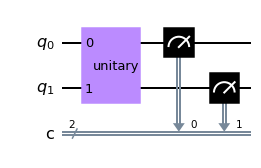

In [77]:
# Once it is checked, we can convert our Oracle into a Quantum Circuit

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

qcirc = QuantumCircuit(qr, cr)
qcirc.append(U, qr)
for i in range(len(qr)):
    qcirc.measure(qr[i], cr[i])
qcirc.draw('mpl')

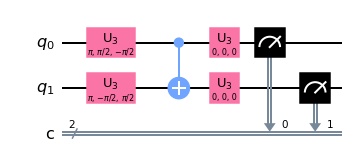

In [78]:
# Decomposing the Oracle into unitary gates

qcirc_decompose = qcirc.decompose()
qcirc_decompose.draw('mpl')

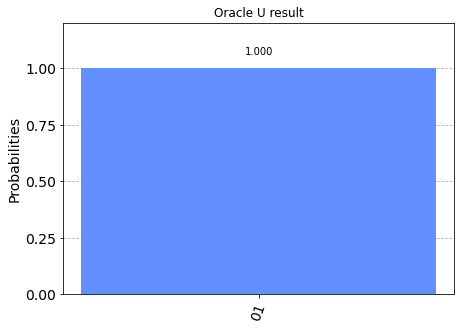

In [79]:
# Execution of the Oracle to see its performance, as the initial state is |00>, we should obtain |01>

backend = BasicAer.get_backend('qasm_simulator')
job = execute(qcirc, backend)
plot_histogram(job.result().get_counts(), title="Oracle U result")

### Tensor Product and Expansion of Operators 

In [73]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.tensor(B)

C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\quantum_info\operators\symplectic\pauli.py:187: DeprecationWarning: Initializing Pauli from `Pauli(label=l)` kwarg is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. Use `Pauli(l)` instead.
  base_z, base_x, base_phase = self._from_label_deprecated(label)


Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [74]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.expand(B)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Composition - B.A

In [75]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.compose(B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

### Composition - A.B

In [76]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.compose(B, front=True)

Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

### Subsystem Composition

In [77]:
# Compose XZ with an 3-qubit identity operator
op = Operator(np.eye(2 ** 3))
XZ = Operator(Pauli(label='XZ'))
op.compose(XZ, qargs=[0, 2])

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [78]:
# Compose YX in front of the previous operator
op = Operator(np.eye(2 ** 3))
YX = Operator(Pauli(label='YX'))
op.compose(XZ, qargs=[0, 2], front=True)

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

### Linear Combinations 

In [79]:
XX = Operator(Pauli(label='XX'))
YY = Operator(Pauli(label='YY'))
ZZ = Operator(Pauli(label='ZZ'))

op = 0.5 * (XX + YY - 3 * ZZ)
op

Operator([[-1.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
          [ 0. +0.j,  1.5+0.j,  1. +0.j,  0. +0.j],
          [ 0. +0.j,  1. +0.j,  1.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j, -1.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Comparison of Operators 

In [82]:
Operator(Pauli(label='X')) == Operator(XGate())

True

In [83]:
Operator(XGate()) == np.exp(1j * 0.5) * Operator(XGate())

False

### Process Fidelity 

In [84]:
# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


### Average Gate Fidelity

In [110]:
# CNOT matrix operator with qubit-0 as control and qubit-1 as target
cx_op = Operator([[1, 0, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0],
                     [0, 1, 0, 0]])

# iSWAP matrix operator
iswap_op = Operator([[1, 0, 0, 0],
                        [0, 0, 1j, 0],
                        [0, 1j, 0, 0],
                        [0, 0, 0, 1]])

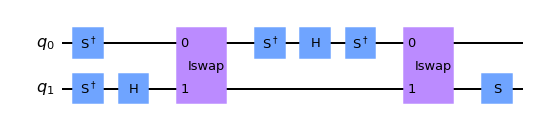

In [112]:
# CNOT in terms of iSWAP and single-qubit gates
cx_circ = QuantumCircuit(2, name='cx<iSWAP>')

# Add gates
cx_circ.sdg(1)
cx_circ.h(1)
cx_circ.sdg(0)
cx_circ.unitary(iswap_op, [0, 1], label='iswap')
cx_circ.sdg(0)
cx_circ.h(0)
cx_circ.sdg(0)
cx_circ.unitary(iswap_op, [0, 1], label='iswap')
cx_circ.s(1)

cx_circ.draw('mpl')

In [114]:
# Simulate the unitary for the circuit using Operator:
unitary = Operator(cx_circ)
print(unitary)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [115]:
f_ave = average_gate_fidelity(cx_op, unitary)
print("Average Gate Fidelity: F = {:f}".format(f_ave))

Average Gate Fidelity: F = 1.000000


### Creating a custom unitary in a noise model

In [117]:
# Error parameters
param_q0 = 0.05  # damping parameter for qubit-0
param_q1 = 0.1   # damping parameter for qubit-1

# Construct the error
qerror_q0 = amplitude_damping_error(param_q0)
qerror_q1 = amplitude_damping_error(param_q1)
iswap_error = qerror_q1.tensor(qerror_q0)

# Build the noise model by adding the error to the "iswap" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(iswap_error, 'iswap')

In [118]:
noise_model.add_basis_gates(['unitary'])
print(noise_model.basis_gates)

['cx', 'id', 'u3', 'unitary']


### Simulating a custom unitary noise model

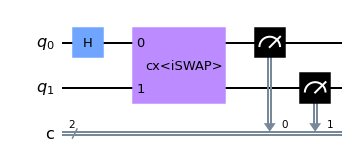

In [119]:
# Bell state circuit where iSWAPS should be inserted at barrier locations
bell_circ = QuantumCircuit(2, 2, name='bell')
bell_circ.h(0)
bell_circ.append(cx_circ, [0, 1])
bell_circ.measure([0,1], [0,1])
bell_circ.draw('mpl')

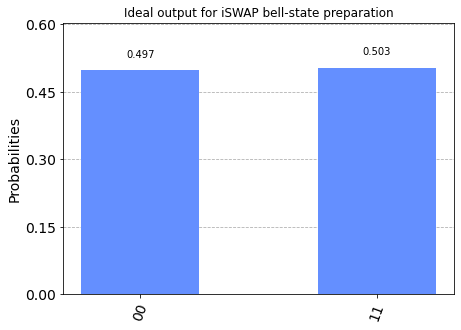

In [120]:
# Create ideal simulator backend and transpile circuit
sim_ideal = AerSimulator()
tbell_circ = transpile(bell_circ, sim_ideal)

ideal_result = sim_ideal.run(tbell_circ).result()
ideal_counts = ideal_result.get_counts(0)
plot_histogram(ideal_counts,
               title='Ideal output for iSWAP bell-state preparation')

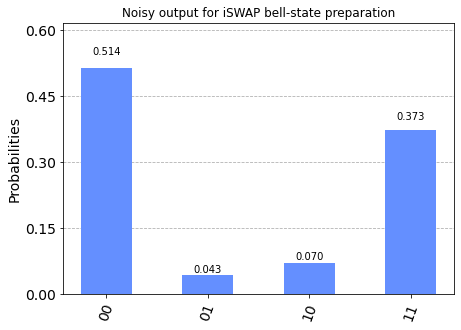

In [121]:
# Create noisy simulator and transpile circuit
sim_noise = AerSimulator(noise_model=noise_model)
tbell_circ_noise = transpile(bell_circ, sim_noise)

# Run on the simulator without noise
noise_result = sim_noise.run(tbell_circ_noise).result()
noise_counts = noise_result.get_counts(bell_circ)
plot_histogram(noise_counts,
               title='Noisy output for iSWAP bell-state preparation')

## Advanced Circuits

### Opaque Gates

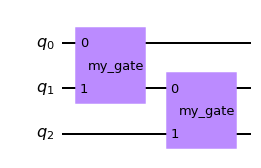

In [122]:
my_gate = Gate(name='my_gate', num_qubits=2, params=[])

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw('mpl')

### Composite Gates

<ipython-input-123-2cf2d551af95>:8: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  sub_circ.u3(1, 2, -2, sub_q[0])


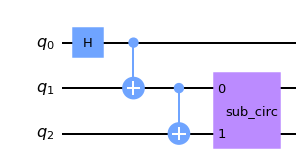

In [123]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw('mpl')

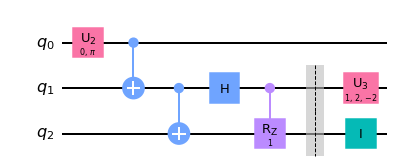

In [124]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw('mpl')

### Parametrized Circuits 

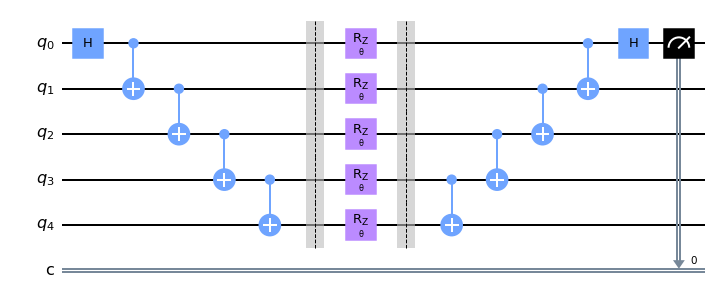

In [125]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

In [126]:
print(qc.parameters)

ParameterView([Parameter(θ)])


### Binding Parameters to Values

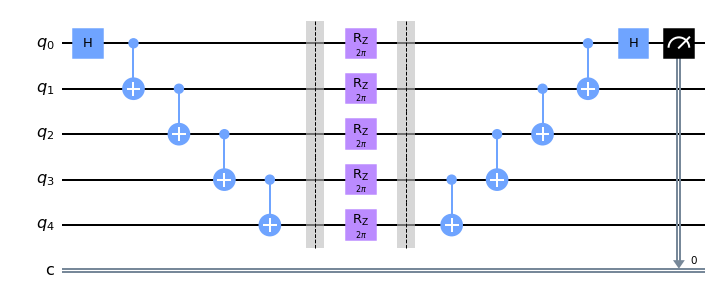

In [127]:
theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw('mpl')

In [128]:
job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range])

counts = job.result().get_counts()

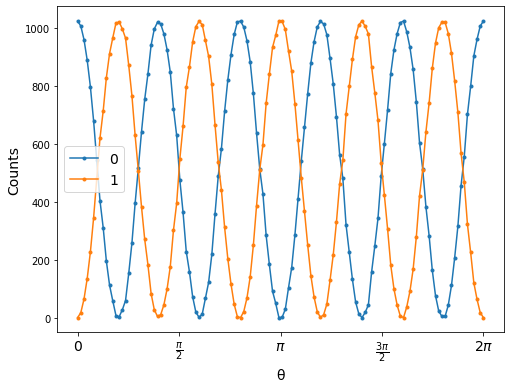

In [129]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

### Reducing Compilation Cost

In [130]:
import time
from itertools import combinations
from qiskit.compiler import assemble
from qiskit.test.mock import FakeVigo

start = time.time()
qcs = []

theta_range = np.linspace(0, 2*np.pi, 32)

for n in theta_range:
    qc = QuantumCircuit(5)

    for k in range(8):
        for i,j in combinations(range(5), 2):
            qc.cx(i,j)
        qc.rz(n, range(5))
        for i,j in combinations(range(5), 2):
            qc.cx(i,j)

    qcs.append(qc)

compiled_circuits = transpile(qcs, backend=FakeVigo())
qobj = assemble(compiled_circuits, backend=FakeVigo())

end = time.time()
print('Time compiling over set of bound circuits: ', end-start)

Time compiling over set of bound circuits:  8.444739580154419


In [131]:
start = time.time()
qc = QuantumCircuit(5)
theta = Parameter('theta')

for k in range(8):
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)
    qc.rz(theta, range(5))
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)

transpiled_qc = transpile(qc, backend=FakeVigo())
qobj = assemble([transpiled_qc.bind_parameters({theta: n})
                 for n in theta_range], backend=FakeVigo())
end = time.time()
print('Time compiling over parameterized circuit, then binding: ', end-start)

Time compiling over parameterized circuit, then binding:  1.3683059215545654


### Composition

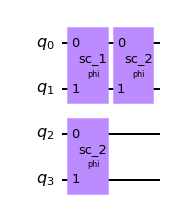

In [133]:
phi = Parameter('phi')

sub_circ1 = QuantumCircuit(2, name='sc_1')
sub_circ1.rz(phi, 0)
sub_circ1.rx(phi, 1)

sub_circ2 = QuantumCircuit(2, name='sc_2')
sub_circ2.rx(phi, 0)
sub_circ2.rz(phi, 1)

qc = QuantumCircuit(4)
qr = qc.qregs[0]

qc.append(sub_circ1.to_instruction(), [qr[0], qr[1]])
qc.append(sub_circ2.to_instruction(), [qr[0], qr[1]])

qc.append(sub_circ2.to_instruction(), [qr[2], qr[3]])

qc.draw('mpl')

# The following raises an error: "QiskitError: 'Name conflict on adding parameter: phi'"
# phi2 = Parameter('phi')
# qc.u3(0.1, phi2, 0.3, 0)

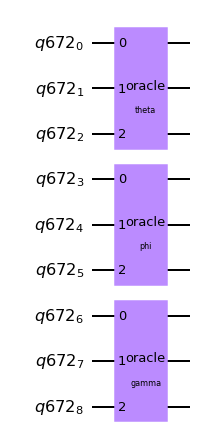

In [136]:
p = Parameter('p')
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])
larger_qc.draw('mpl')



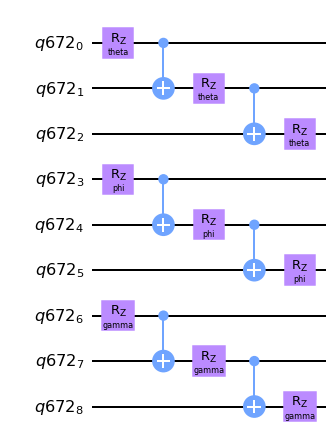

In [137]:
larger_qc.decompose().draw('mpl')

## Conditional Operations

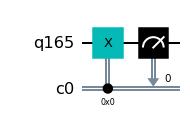

In [59]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

In [61]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 1024}

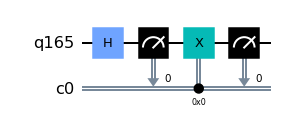

In [62]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

In [63]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 1024}

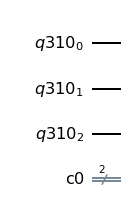

In [101]:
# More quantum operations
q = QuantumRegister(3)
c = ClassicalRegister(2)

qc_ops = QuantumCircuit(q, c)
qc_ops.draw('mpl')

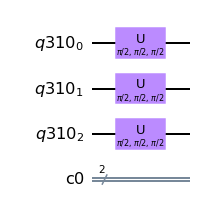

In [104]:
qc_ops.u(np.pi/2,np.pi/2,np.pi/2,0) # Remember u3 is deprecated
qc_ops.draw('mpl')

In [105]:
backend = BasicAer.get_backend('unitary_simulator')
job_ops = execute(qc_ops, backend)
job_ops.result().get_unitary(qc_ops, decimals=3)

array([[ 0.354+0.j   , -0.   -0.354j, -0.   -0.354j, -0.354+0.j   ,
        -0.   -0.354j, -0.354+0.j   , -0.354+0.j   ,  0.   +0.354j],
       [ 0.   +0.354j, -0.354+0.j   ,  0.354-0.j   ,  0.   +0.354j,
         0.354-0.j   ,  0.   +0.354j, -0.   -0.354j,  0.354-0.j   ],
       [ 0.   +0.354j,  0.354-0.j   , -0.354+0.j   ,  0.   +0.354j,
         0.354-0.j   , -0.   -0.354j,  0.   +0.354j,  0.354-0.j   ],
       [-0.354+0.j   , -0.   -0.354j, -0.   -0.354j,  0.354-0.j   ,
         0.   +0.354j, -0.354+0.j   , -0.354+0.j   , -0.   -0.354j],
       [ 0.   +0.354j,  0.354-0.j   ,  0.354-0.j   , -0.   -0.354j,
        -0.354+0.j   ,  0.   +0.354j,  0.   +0.354j,  0.354-0.j   ],
       [-0.354+0.j   , -0.   -0.354j,  0.   +0.354j, -0.354+0.j   ,
        -0.   -0.354j,  0.354-0.j   , -0.354+0.j   , -0.   -0.354j],
       [-0.354+0.j   ,  0.   +0.354j, -0.   -0.354j, -0.354+0.j   ,
        -0.   -0.354j, -0.354+0.j   ,  0.354-0.j   , -0.   -0.354j],
       [-0.   -0.354j,  0.354-0.j   ,  0.

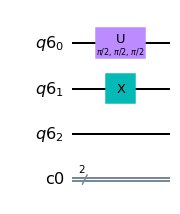

In [16]:
qc_ops.x(1)
qc_ops.draw('mpl')

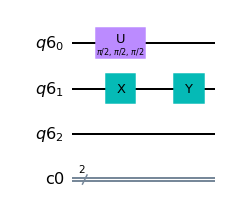

In [17]:
qc_ops.y(1)
qc_ops.draw('mpl')

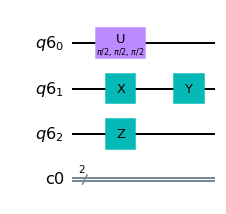

In [18]:
qc_ops.z(2)
qc_ops.draw('mpl')

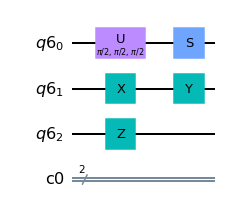

In [19]:
qc_ops.s(0)
qc_ops.draw('mpl')

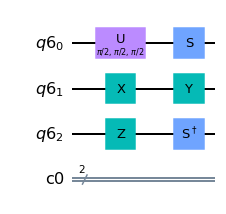

In [20]:
qc_ops.sdg(2)
qc_ops.draw('mpl')

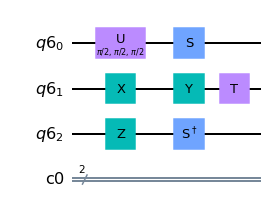

In [21]:
qc_ops.t(1)
qc_ops.draw('mpl')

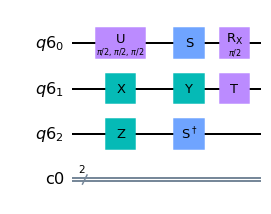

In [22]:
qc_ops.rx(np.pi/2, 0)
qc_ops.draw('mpl')

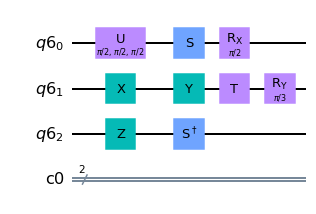

In [23]:
qc_ops.ry(np.pi/3, 1)
qc_ops.draw('mpl')

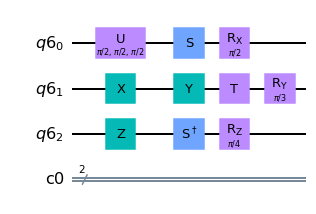

In [24]:
qc_ops.rz(np.pi/4, 2)
qc_ops.draw('mpl')

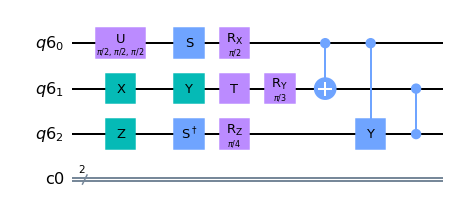

In [25]:
# Controlled operations

qc_ops.cx(0, 1)
qc_ops.cy(0, 2)
qc_ops.cz(1, 2)

qc_ops.draw('mpl')

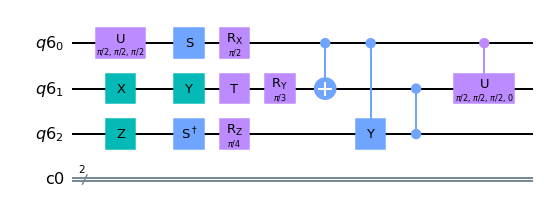

In [26]:
qc_ops.cu(np.pi/2,np.pi/2,np.pi/2, 0, 0, 1) #u3 is deprecated

qc_ops.draw('mpl')

In [27]:
from qiskit import BasicAer
backend = BasicAer.get_backend('unitary_simulator')
job_ops = execute(qc_ops, backend)
job_ops.result().get_unitary(qc_ops, decimals=3)

array([[ 0.56575836-0.23434479j, -0.56575836+0.23434479j,
         0.32664074+0.13529903j, -0.32664074-0.13529903j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
        -0.39667667+0.30438071j, -0.39667667+0.30438071j,
        -0.0652631 +0.49572243j, -0.0652631 +0.49572243j],
       [ 0.32664074-0.13529903j, -0.32664074+0.13529903j,
        -0.56575836-0.23434479j,  0.56575836+0.23434479j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.49572243-0.0652631j ,  0.49572243-0.0652631j ,
        -0.30438071+0.39667667j, -0.30438071+0.39667667j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0

In [28]:
desired_vector = [
    1 / np.sqrt(16) * complex(0, 1),
    1 / np.sqrt(8) * complex(1, 0),
    1 / np.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / np.sqrt(8) * complex(1, 2),
    1 / np.sqrt(16) * complex(1, 0),
    0]
print(desired_vector)

[0.25j, (0.35355339059327373+0j), (0.25+0.25j), 0, 0, (0.35355339059327373+0.7071067811865475j), (0.25+0j), 0]


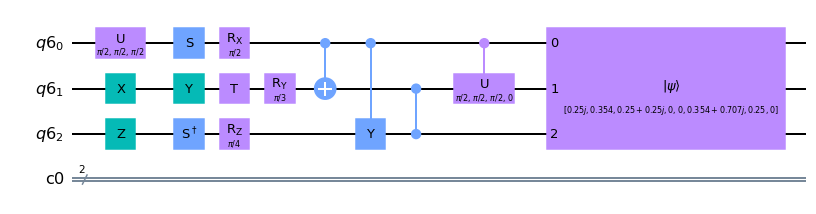

In [29]:
qc_ops.initialize(desired_vector, [0,1,2])
qc_ops.draw('mpl')

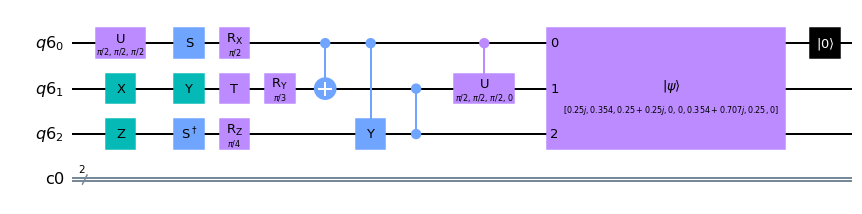

In [30]:
qc_ops.reset(0)
qc_ops.draw('mpl')

In [ ]:
# Practise time: Just play locally and try to reproduce some of the previous executions

# Exercise: Build the circuit for the 3-qubits Bell state. Execute it in qasm and eigenvector simulators and visualize 
# the results using three different types of visualizations.

In [3]:
%qiskit_version_table
%qiskit_copyright